### I  have chosen the Titanic data set.

### Some questions to answer:

- Who were the passengers on Titanic:
    - where did they embarked
    - their demography (age, sex, class)
    - were they with family aboard or not
    
- How many have survived and what factors helped them to survive (sex, ages, class, etc.)

###############################################################
####  INTRODUCTION: The story behind the numbers


To make a better analisys it is important to know the story behind the data. It may help to rise right questions and to make better conclusions.

So, everybody is aware about Titanic's story, but in general, people don't know a lot of details concerning it. That is why the article from Wikipedia is useful to give some light.

Source: https://en.wikipedia.org/wiki/RMS_Titanic

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean on 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. 

The exact number of people aboard is not known, as not all of those who had booked tickets made it to the ship. Titanic's passengers numbered approximately 1,317 people and around 885 crew members on board. The ship was considerably under capacity on her maiden voyage, as she could accommodate 2,453 passengers. 

After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York. On 14 April, four days into the crossing, she hit an iceberg at 11:40 p.m. ship's time. Some  passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats. At 2:20 a.m., she broke apart and foundered with well over one thousand people still aboard. 

In [108]:
# The figure shows the timing of Titanic sinking
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/4/48/Sinking_of_the_RMS_Titanic_animation.gif')

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

##################################################
### Wrangling phase

The data was obtained from Udacity website Intro to Programming Nanodegree for the Final Project.

### Getting familiar with the data set

In [110]:
titanic_original_dataframe = pd.read_csv("titanic_data.csv") 
# Read the data from titanic_data.csv file

In [111]:
titanic_original_dataframe.shape 
# Check the dimensions of the data set. There are 12 columns and 891 rows

(891, 12)

In [112]:
titanic_original_dataframe.dtypes 
# Check the variables data types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [113]:
print(titanic_original_dataframe.describe()) 
# Gets statistical summary of the numerical variables

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Since, describe gives only numerical data analysis, 
let's check if some data is missing in object type data

In [114]:
titanic_original_dataframe["Name"].isnull().sum() 
# Cheks for the number of the missing values in the column "Name"

0

In [115]:
titanic_original_dataframe["Sex"].isnull().sum() 
# Chek for the number of the missing values in the column "Sex"

0

In [116]:
titanic_original_dataframe["Cabin"].isnull().sum() 
# Chek for the number of the missing values in the column "Cabin"

687

In [117]:
titanic_original_dataframe["Ticket"].isnull().sum() 
# Chek for the number of the missing values in the column "Ticket"

0

In [118]:
titanic_original_dataframe["Embarked"].isnull().sum() 
# Chek for the number of the missing values in the column "Embarked"
# Since the number is small we can simply ignore thiss missing values

2

### Some of the very first conclusions: 

A lot of data about age is missing (only 714 from 891 are available). The remaining data shows that the average age of the passengers was about 30 years old. The youngest passenger was about 5 months old and the oldest was 80 years old!!!

There were 3 classes of passengers.

Some people were with a lot of family members aboard : SibSp max is 8 and Parch is 6.

It is unexpected that the min fare is "0", but for this analysis it is not any issue.

The mean value for Survived is 0.38, so only 38% of passengers were lucky enough to survive...

A lot of data about cabin is missing (687 from 891 are NOT available).

### Original Data Dictionary
Data Dictionary from https://www.kaggle.com/c/titanic/data

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	         Sex	

Age  	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [119]:
titanic_original_dataframe.head() 
# Prints the head of the original data to see what it looks like

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
titanic_dataframe = pd.DataFrame.copy(titanic_original_dataframe) 
# Makes a copy of the original data frame 

## Dealing With Missing Data

    Since a lot of data is missing in the "Age" and "Cabin" columns, 
    it is not a good idea to drop off all those rows.
    
### Dealing With Missing Data in the Column "Age"

The very first idea is to fill all the missing data of this column with the random values between (mean - std) and (mean + std), or in another words with the numbers between (15 - 45). 

On the other hand, it is possible to fill the missing values taking in consideration the titles that appear in each name. 

1) "Master" is a title for an underage male. If a person is under 18, master would be used. Once a person turns 18 and enters adulthood, "Mister" would be used. Source: https://writingexplained.org/master-vs-mister-difference . 

Note: For this analysis the age of 12 seems to be more reasonable to make the diference between the both titles, because the dataset has no mention of "Master" for people older than 12 years old.

2) "Miss" is an English language honorific traditionally used only for an unmarried woman. "Mrs." is for married woman.

These are the most common titles. Let's see what other titles does this column contain?


In [121]:
def titles(column_name):
    """    
    
    This function has a column of names as an input, it has no return, but it prints some 
    special titles that are different from the four main titles (Master, Mister, Mrs, Miss)
      
    """    
    for row_in_name in column_name:
        
        name = str(row_in_name)
        if ", Miss. " in name:     
            pass       
        elif ", Master. " in name:
            pass                    
        elif ", Mrs. " in name:
            pass
        elif ", Mr. " in name:            
            pass
        else:
            print(row_in_name)  # to show the titles other than above mentioned  

In [122]:
titles(titanic_dataframe["Name"])
# prints all the titles other than Mr, Mrs, Miss or Master

Uruchurtu, Don. Manuel E
Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Minahan, Dr. William Edward
Carter, Rev. Ernest Courtenay
Moraweck, Dr. Ernest
Aubart, Mme. Leontine Pauline
Pain, Dr. Alfred
Reynaldo, Ms. Encarnacion
Peuchen, Major. Arthur Godfrey
Butt, Major. Archibald Willingham
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
Kirkland, Rev. Charles Leonard
Stahelin-Maeglin, Dr. Max
Sagesser, Mlle. Emma
Simonius-Blumer, Col. Oberst Alfons
Frauenthal, Dr. Henry William
Weir, Col. John
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
Crosby, Capt. Edward Gifford
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
Brewe, Dr. Arthur Jackson
Leader, Dr. Alice (Farnham)
Reuchlin, Jonkheer. John George
Harper, Rev. John
Montvila, Rev. Juozas


#### Analysis of the other titles:

"Mlle." is a French equivalent to "Miss." and "Mme." is the same as "Mrs.", so it is OK to include them in those titles.

So, the other more frequent titles are "Rev." for Reverends and "Dr." for "Doctor".

Since, there are no too much different titles, for more simplicity, we will fit them into existing titles

In [123]:
def title_from_name(column_name):
    """        
    This function has a column "Name" as an input, it returns the list containing all the titles.  
    "Special title" string is given to all titles that are different from 
    the four main titles (Master, Mister, Mrs, Miss)
    """
    titles = []

    for row_in_name in column_name:
        
        name = str(row_in_name)
        if ", Miss. " in name:
            titles.append("Miss")            
        elif ", Mlle. " in name: # she was referred as Mrs in her name
            titles.append("Mrs")
        elif ", Master. " in name:
            titles.append("Master")                    
        elif ", Mrs. " in name: 
            titles.append("Mrs")
        elif ", Mr. " in name:
            titles.append("Mr")
        elif ", Mme. " in name:            
            titles.append("Mrs")     #  "Mme." in French is the same as "Mrs."
        elif ", Dr. " in name:            
            titles.append("Mr")
        elif ", Major. " in name:            
            titles.append("Mr")        
        elif ", Capt. " in name:            
            titles.append("Mr")
        elif ", Lady. " in name:            
            titles.append("Mrs")
        elif ", Sir. " in name:            
            titles.append("Mr")
        elif ", Rev. " in name:            
            titles.append("Mr")
        elif ", Jonkheer. " in name:            
            titles.append("Mr")
        elif " Countess. " in name:            
            titles.append("Mrs")
        elif ", Don. " in name:            
            titles.append("Mr")
        elif ", Col. " in name:            
            titles.append("Mr")
        elif ", Ms. " in name:            
            titles.append("Mr")     
        else:
            print(row_in_name) # to check if some title is still missing
  
    return titles

In [124]:
titanic_dataframe["Title"] = pd.DataFrame(title_from_name(titanic_dataframe["Name"]))
# creats a new column of titles
titanic_dataframe[["Title","Name"]].head()
# to check if it works as expected

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"


In [125]:
titanic_dataframe["Title"].value_counts()
# value counts of all titles

Mr        539
Miss      182
Mrs       130
Master     40
Name: Title, dtype: int64

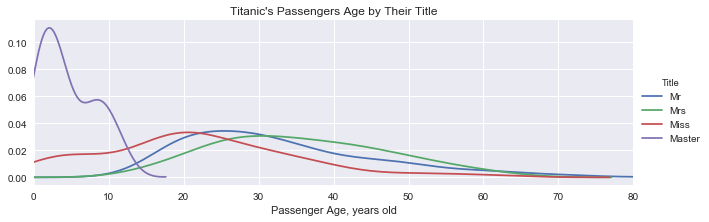

In [126]:
# Shows the relation between the title and the age distribuition for Titanic's passengers
graph_age_title=sns.FacetGrid(titanic_dataframe,hue='Title', aspect=3)
graph_age_title.map(sns.kdeplot,'Age')
graph_age_title.add_legend()
graph_age_title.set(xlim=(0,80)) # 0 is for the minimal age and 80 is for the maximum age of passengers
plt.xlabel("Passenger Age, years old")
plt.title("Titanic's Passengers Age by Their Title")

#### Deeper analysis of existing values for "Age" column.
    

In [127]:
title_age_pclass_df = titanic_dataframe[["Title","Age","Pclass"]]
# creates a smaller dataframe containing only 3 columns "Title","Age","Pclass"

In [128]:
all_master_df = title_age_pclass_df[title_age_pclass_df.Title == 'Master']
all_master_df = all_master_df[["Age"]]
# all_master_df - dataframe contaning age information only for people with the title 'Master'

In [129]:
all_mister_df = title_age_pclass_df[title_age_pclass_df.Title == 'Mr']
all_misters_df = all_mister_df[["Age"]]
# all_misters_df - dataframe contaning age information only for people with the title 'Mr'

In [130]:
all_miss_df = title_age_pclass_df[title_age_pclass_df.Title == 'Miss']
all_class_miss_df = all_miss_df[["Age"]]
# all_miss_df - dataframe contaning age information only for people with the title 'Miss'

In [131]:
all_mrs_df = title_age_pclass_df[title_age_pclass_df.Title == 'Mrs']
all_class_mrs_df = all_mrs_df[["Age"]]
# all_miss_df - dataframe contaning age information only for people with the title 'Mrs'

In [132]:
print(all_class_mrs_df.describe())
# age information only for people with the title 'Mrs'

              Age
count  113.000000
mean    35.663717
std     11.402232
min     14.000000
25%     27.000000
50%     35.000000
75%     44.000000
max     63.000000


In [133]:
all_class_mrs_df["Age"].isnull().sum() 
# number of values missing in Age column for the title "Mrs"

17

In [134]:
print(all_class_miss_df.describe())
# age information only for people with the title 'Mrs'

              Age
count  146.000000
mean    21.773973
std     12.990292
min      0.750000
25%     14.125000
50%     21.000000
75%     30.000000
max     63.000000


In [135]:
all_class_miss_df["Age"].isnull().sum() 
# number of values missing in Age column for the title "Miss"

36

In [136]:
print(all_master_df.describe())
# age information only for people with the title 'Master'

             Age
count  36.000000
mean    4.574167
std     3.619872
min     0.420000
25%     1.000000
50%     3.500000
75%     8.000000
max    12.000000


In [137]:
all_master_df["Age"].isnull().sum() 
# number of values missing in Age column for the title "Master"

4

#### For "Master" title:

To fill the missing values for this title we can use the interval of random numbers from 1 to 8.
Max value is 12, so, probably for 1912 year it was the age to define the difference between "Master" and "Mister".

In [138]:
print(all_misters_df.describe())
# age information only for people with the title 'Mr'

              Age
count  419.000000
mean    33.010740
std     12.983031
min     11.000000
25%     23.000000
50%     30.000000
75%     40.000000
max     80.000000


In [139]:
all_misters_df["Age"].isnull().sum() 
# number of values missing in Age column for the title "Mister"

120

In [140]:
print(all_misters_df.describe())
# age information only for people with the title 'Mr'

              Age
count  419.000000
mean    33.010740
std     12.983031
min     11.000000
25%     23.000000
50%     30.000000
75%     40.000000
max     80.000000


### More detailed analysis for titles: Mr, Miss and Mrs

Since almost 30% of data is missing for the "Mr" title and it is necessary to fill 119 values, 
deeper analysis of ages  is done, considering Pclass.

For Miss and Mrs deeper analysis of ages  is done, considering Pclass.

In [141]:
pclass1_mr_df = all_mister_df[all_mister_df.Pclass == 1] # selects only rows for Mr and Pclass 1
pclass2_mr_df = all_mister_df[all_mister_df.Pclass == 2] # selects only rows for Mr and Pclass 2
pclass3_mr_df = all_mister_df[all_mister_df.Pclass == 3] # selects only rows for Mr and Pclass 3
pclass1_mr_df = pclass1_mr_df[["Age"]] # ages for title "Mr" for the Pclass 1
pclass2_mr_df = pclass2_mr_df[["Age"]] # ages for title "Mr" for the Pclass 2
pclass3_mr_df = pclass3_mr_df[["Age"]] # ages for title "Mr" for the Pclass 3

In [142]:
pclass1_mr_df["Age"].isnull().sum() 
# number of NaN values for title "Mr" for the Pclass 1

21

In [143]:
print(pclass1_mr_df.describe())

             Age
count  99.000000
mean   42.449495
std    13.890699
min    17.000000
25%    31.000000
50%    42.000000
75%    51.000000
max    80.000000


In [144]:
pclass2_mr_df["Age"].isnull().sum()  
# number of NaN values for title "Mr" for the Pclass 2

9

In [145]:
print(pclass2_mr_df.describe())

             Age
count  91.000000
mean   33.527473
std    12.203907
min    16.000000
25%    25.000000
50%    31.000000
75%    39.000000
max    70.000000


In [146]:
pclass3_mr_df["Age"].isnull().sum()  
# number of NaN values for title "Mr" for the Pclass 3

90

In [147]:
print(pclass3_mr_df.describe())

              Age
count  229.000000
mean    28.724891
std     10.490946
min     11.000000
25%     21.000000
50%     26.000000
75%     34.000000
max     74.000000


#### For  title "Mr", considering his passenger class :

It will be more accurate to generate random values withing the ranges based on the passenger class.

For Pclass = 1 and title "Mr" the average ages are in the range 27-55 years

For Pclass = 2 and title "Mr" the average ages are in the range 20-44 years

For Pclass = 3 and title "Mr" the average ages are in the range 18-38 years

In [148]:
pclass1_mrs_df = all_mrs_df[all_mrs_df.Pclass == 1] # selects only rows for Mrs and Pclass 1
pclass2_mrs_df = all_mrs_df[all_mrs_df.Pclass == 2] # selects only rows for Mrs and Pclass 2
pclass3_mrs_df = all_mrs_df[all_mrs_df.Pclass == 3] # selects only rows for Mrs and Pclass 3
pclass1_mrs_df = pclass1_mrs_df[["Age"]] # ages for title "Mr" for the Pclass 1
pclass2_mrs_df = pclass2_mrs_df[["Age"]] # ages for title "Mr" for the Pclass 2
pclass3_mrs_df = pclass3_mrs_df[["Age"]] # ages for title "Mr" for the Pclass 3

In [149]:
pclass1_mrs_df["Age"].isnull().sum() 
# number of NaN values for title "Mrs" for the Pclass 1

8

In [150]:
print(pclass1_mrs_df.describe())

             Age
count  39.000000
mean   39.564103
std    12.748157
min    17.000000
25%    33.000000
50%    39.000000
75%    49.500000
max    62.000000


In [151]:
pclass2_mrs_df["Age"].isnull().sum() 
# number of NaN values for title "Mrs" for the Pclass 2

0

In [152]:
print(pclass2_mrs_df.describe())


             Age
count  41.000000
mean   33.682927
std    10.318525
min    14.000000
25%    26.000000
50%    32.000000
75%    41.000000
max    57.000000


In [153]:
pclass3_mrs_df["Age"].isnull().sum() 
# number of NaN values for title "Mrs" for the Pclass 3

9

In [154]:
print(pclass3_mrs_df.describe())

             Age
count  33.000000
mean   33.515152
std    10.031579
min    15.000000
25%    27.000000
50%    31.000000
75%    40.000000
max    63.000000


#### For "Mrs" title, considering her passenger class :

It will be more accurate to generate random values withing the ranges based on the passenger class.

For Mrs from Pclass = 1, the range should be 27-52 
            it is really strange to have 8 values missing for the First Class Mrs, 
            almost the same of NaN values for the Third Class Mrs

For Mrs from Pclass = 2 there is no missing data, 

For Mrs from Pclass = 3, the range should be 23-43

It was shoking to me to discover that the min age of married women was 14 years old for the Second Class and 15 years old for the Third Class


In [155]:
pclass1_miss_df = all_miss_df[all_miss_df.Pclass == 1] # selects only rows for Miss and Pclass 1
pclass2_miss_df = all_miss_df[all_miss_df.Pclass == 2] # selects only rows for Miss and Pclass 2
pclass3_miss_df = all_miss_df[all_miss_df.Pclass == 3] # selects only rows for Miss and Pclass 3
pclass1_miss_df = pclass1_miss_df[["Age"]]  # ages for title "Miss" for the Pclass 1
pclass2_miss_df = pclass2_miss_df[["Age"]]  # ages for title "Miss" for the Pclass 2
pclass3_miss_df = pclass3_miss_df[["Age"]]  # ages for title "Miss" for the Pclass 3-

In [156]:
pclass1_miss_df["Age"].isnull().sum() 
# number of NaN values for title "Miss" for the Pclass 1

1

In [157]:
print(pclass1_miss_df.describe())

             Age
count  45.000000
mean   30.000000
std    12.852308
min     2.000000
25%    21.000000
50%    30.000000
75%    36.000000
max    63.000000


In [158]:
pclass2_miss_df["Age"].isnull().sum() 
# number of NaN values for title "Miss" for the Pclass 2

2

In [159]:
print(pclass2_miss_df.describe())

             Age
count  32.000000
mean   22.390625
std    13.374708
min     2.000000
25%    11.750000
50%    24.000000
75%    30.625000
max    50.000000


In [160]:
pclass3_miss_df["Age"].isnull().sum() 
# number of NaN values for title "Miss" for the Pclass 3

33

In [161]:
print(pclass3_miss_df.describe())

             Age
count  69.000000
mean   16.123188
std     9.697315
min     0.750000
25%     9.000000
50%    18.000000
75%    22.000000
max    45.000000


#### For "Miss" title :

Only a few values are missing for Pclass 1 and 2, so, we can use the range from pclass3_miss_df
from 6 to 26 to generate random numbers to fill the missing data.

#### New column "AgeEstim" to fill the missing values for "Age" column.

The figure above, as well as more detailed analysis on the existing data about age are used as guidance to choose the random values range for each category.    

In [162]:
titanic_dataframe["AgeEstim"] = titanic_dataframe["Age"].fillna(100)
# creates a new column with no missing values (NaN)
# "100" was chosen to differentiate the missing data from original,
# since the max of existing values is 80.

In [163]:
def age_by_title(age_estime):
    """
    This function takes age and title values as inputs. 
    For the missing values which were filled with the number "100" 
    it returns a new value of age accordingly to the title of the person, 
    Every choice is explained in the previous analysis.  
    """    
    
    age,title,pclass = age_estime
    if age == 100:        # checks if the data was missing in the original set
        if title == "Mr":
            if pclass == 1:
                age_random = random.randint(27, 55)
                
                return age_random
            elif pclass == 2:
                age_random = random.randint(20, 44)
                return age_random
            elif pclass == 3:
                age_random = random.randint(18, 38)
                return age_random
        elif title == "Mrs":
            if pclass == 1:
                age_random = random.randint(27, 52)
                return age_random            
            elif pclass == 3:
                age_random = random.randint(23, 43)
                
                return age_random
            
        elif title == "Miss":
            age_random = random.randint(6, 26)
            return age_random
        elif title == "Master":
            age_random = random.randint(1, 8)
            
            return age_random
        
    else:
        return age # returns the "age" from original "existing" data

In [164]:
titanic_dataframe["AgeEstim"]=titanic_dataframe[["AgeEstim","Title","Pclass"]].apply(age_by_title,axis=1) 
# creats values for missing values of passenger age

In [165]:
titanic_dataframe[["Age","AgeEstim","Title","Pclass"]].head(10)
# to check if it works correctly

,Age,AgeEstim,Title,Pclass
0,22.0,22.0,Mr,3
1,38.0,38.0,Mrs,1
2,26.0,26.0,Miss,3
3,35.0,35.0,Mrs,1
4,35.0,35.0,Mr,3
5,NaN,34.0,Mr,3
6,54.0,54.0,Mr,1
7,2.0,2.0,Master,3
8,27.0,27.0,Mrs,3
9,14.0,14.0,Mrs,2


   
### Dealing With Missing Data in the Column "Cabin":

Some considerations:

    Source: https://www.encyclopedia-titanica.org/cabins.html
    
Apart from the recollections of survivors and a few tickets and boarding cards, the only authoritative source of cabin data is the incomplete first class passenger list recovered with the body of steward Herbert Cave.
    
   First Class - Boat Deck - (Cabin "T") , A Deck, B Deck, C Deck,	D  Deck, E  Deck.

   Second Class - D Deck, E Deck, F Deck

   Third Class D Deck, E Deck, F Deck, G Deck


#### Considering all thees facts, there is no easy means to fill all missing cabin values. 

Instead, it is more viable to create a new colum "Deck" and fill all the missing values with the deck levels, based on the first letter of cabins and passenger class.

There are some unexpected cabin names like "F E69", "F G73", "F G63", "F G73", etc. The second letter means "section" on the deck level, so, only the first letter will be considered as a deck level.

In [166]:
titanic_dataframe["Deck"] = titanic_dataframe["Cabin"].fillna("unknown") 
# creats a new column for deck number(letter) based on "Cabin" names; 
# missing values are substituted by the string "unknown"

In [167]:
def cabin_on_deck(cabin_name):
    """
    This function has as an input the string with the name of each cabin and 
    returns its first letter as a deck level.
    
    All cabin_name values come from titanic_dataframe["Cabin"]. 
    "deck" is a list where all deck levels are stored.
    """
    deck = []
    for cabin in cabin_name:
               
        if cabin == "unknown": 
            # if cabin number is unknown, so deck is unknown;             
            deck.append("unknown")                
           
        else:            
            deck.append(cabin[0])
        
    return deck

In [168]:
titanic_dataframe["Deck"] = pd.DataFrame(cabin_on_deck(titanic_dataframe["Deck"]))
# The output from the function cabin_on_deck(cabin_name) which is a list
# is transformed into DataFrame to be used as a new column

In [169]:
titanic_dataframe[["Deck","Cabin"]].head()
# prints to check if it works

,Deck,Cabin
0,unknown,NaN
1,C,C85
2,unknown,NaN
3,C,C123
4,unknown,NaN


In [170]:
(titanic_dataframe["Deck"]).value_counts()
# counts each deck level on the list

unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Deck, dtype: int64

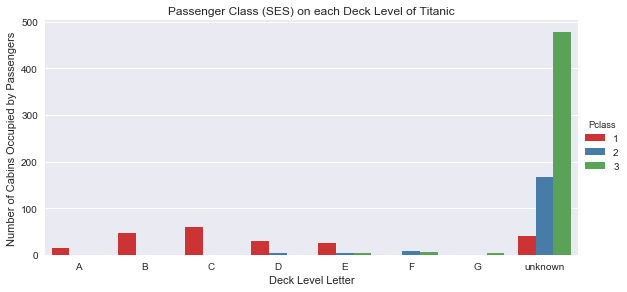

In [171]:
sns.factorplot(x="Deck",data= titanic_dataframe,kind="count", palette="Set1", aspect = 2, 
               hue = "Pclass", order = ["A","B", "C", "D", "E", "F", "G", "unknown"])
plt.ylabel("Number of Cabins Occupied by Passengers")
plt.xlabel("Deck Level Letter")
plt.title("Passenger Class (SES) on each Deck Level of Titanic")

#### Conclusion:

Unfortunatelly, TOO MUCH data is missing. As it was mentionned above, mostly the data for First Class cabins is available.

For sure, the deck level should be somehow related to the passenger class, so how it was located on Titanic?

In [172]:
# The figure shows the deck plan of Titanic 

Image(url='https://i.pinimg.com/600x315/dd/a4/49/dda4498b1eebd33411b4b1b5b14774d6.jpg')

This figure shows that Third class passengers were separated into two blocks of cabins on the ship.
On this web site: https://www.encyclopedia-titanica.org/fatal-journey-third-class-men.html) I've found some very useful explanation:

Single women and families with children were quartered in the extreme after end of the stern from D Deck down to G, far from the forward end of the bow on the starboard side of the ship where the collision occurred. 
    
Third Class passengers residing in the forward quarters—overwhelmingly single men, along with a relatively small number of childless couples.

So, I will use this information to fill the missing values in the "Deck" column.

In [173]:
def deck_by_class(deck_values):
    """
    This function takes the data on deck, family and passenger class  as inputs. 
    For the missing values which were filled with the string "unknown" 
    it returns values based on passenger class, title and family members (sibsp and parch) information.    
    The format is "DeckLetter  + PassengerClass + (bow/stern, only for the Third Class)"
    "deck_random" is keeping the info of the Deck for each passenger
    """        
    deck,p_class,title,parch,spouse = deck_values
    
    # All existing Deck values should be adapted 
    # to the new format "DeckLetter + PassengerClass"
    
    if deck == "D":
        if p_class == 1:        
            deck_random = 'D1'
            
        elif p_class == 2:        
            deck_random = "D2"
    

    elif deck == "E":
        if p_class == 1:        
            deck_random = 'E1'
            
        elif p_class == 2:        
            deck_random = "E2"
                      
        elif p_class == 3:
            
            if title != "Mr":
                if title == "Mrs" and parch == 0 and spouse == 1: # Only spouses in couples without children
                    deck_random = 'E3 bow'
                else:
                    deck_random = 'E3 stern'
            else:
                if title == "Mr" and parch >0: # Only Mr with family could go to the stern part
                    deck_random = 'E3 stern'
                else:
                    deck_random = 'E3 bow'
   
            
    elif deck == "F" or deck == "G":
        if p_class == 2:        
            deck_random = deck+"2"
        else: 
            if title != "Mr":
                if title == "Mrs" and parch == 0 and spouse == 1: # Only spouses in couples without children
                    deck_random = deck+'3 bow'
                else:
                    deck_random = deck+'3 stern'
            else:
                if title == "Mr" and parch >0: # Only Mr with family could go to the stern part
                    deck_random = deck+'3 stern'
                else:
                    deck_random = deck+'3 bow'       
           
    # Secondly, all unknown Deck values should be attribuited randomly  
    # the format is "DeckLetter  + PassengerClass + (bow/stern, only for the Third Class)"
    
    elif deck == "unknown":
        if p_class == 1:        
            deck_random = random.choice(['B1', 'C1', 'D1'])
            
        elif p_class == 2:        
            deck_random = random.choice(['E2', 'F2', 'D2'])
            
        elif p_class == 3:
            if title != "Mr":
                if title == "Mrs" and parch == 0 and spouse == 1: # Only spouses in couples without children
                    deck_random = random.choice(['D3 bow','E3 bow', 'F3 bow', 'G3 bow'])
                else:
                    deck_random = random.choice(['D3 stern','E3 stern', 'F3 stern', 'G3 stern'])
            else:
                if title == "Mr" and parch >0:# Only Mr with family could be in the stern part
                    deck_random = random.choice(['D3 stern','E3 stern', 'F3 stern', 'G3 stern'])
                else:
                    deck_random = random.choice(['D3 bow','E3 bow', 'F3 bow', 'G3 bow'])       

            
    else:
        deck_random = deck+"1"
        print(deck_random)
    
    return deck_random

In [174]:
titanic_dataframe["DeckEstim"] = titanic_dataframe[["Deck","Pclass","Title","Parch","SibSp"]].apply(deck_by_class,axis=1) 
# creats a new column with more or less realistic values for missing values for the decks, 
# based on such information as pclass, title, parch and Sibsp

C1
C1
C1
A1
C1
B1
B1
C1
B1
C1
C1
A1
C1
B1
C1
B1
C1
B1
A1
C1
A1
B1
B1
A1
C1
C1
C1
C1
B1
B1
C1
C1
C1
A1
B1
C1
C1
B1
C1
C1
C1
B1
C1
C1
B1
C1
C1
C1
T1
C1
C1
B1
C1
B1
C1
C1
B1
C1
A1
C1
C1
C1
A1
B1
C1
B1
C1
C1
B1
C1
B1
B1
C1
B1
B1
B1
C1
C1
A1
C1
C1
A1
B1
A1
C1
A1
B1
B1
A1
C1
B1
B1
B1
B1
C1
C1
C1
C1
C1
C1
B1
B1
C1
B1
B1
B1
B1
B1
B1
B1
B1
A1
B1
B1
B1
C1
C1
A1
B1
C1
B1
C1


In [175]:
titanic_dataframe[["DeckEstim","Deck","Pclass","Title","Parch","SibSp"]].head()
# check if new values are as expected

,DeckEstim,Deck,Pclass,Title,Parch,SibSp
0,G3 bow,unknown,3,Mr,0,1
1,C1,C,1,Mrs,0,1
2,E3 stern,unknown,3,Miss,0,0
3,C1,C,1,Mrs,0,1
4,F3 bow,unknown,3,Mr,0,0


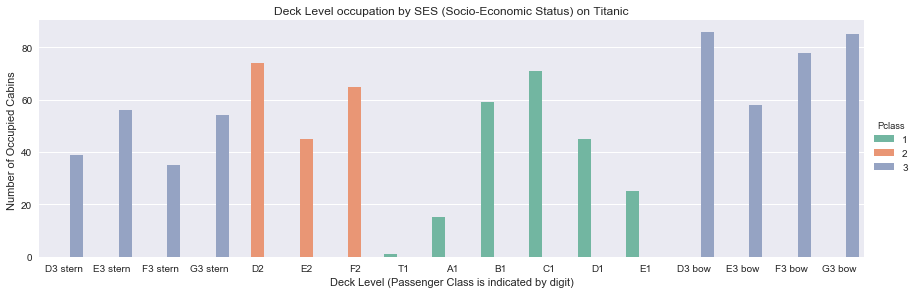

In [176]:

sns.factorplot(x="DeckEstim",data= titanic_dataframe,kind="count", palette="Set2", aspect = 3, 
               hue = "Pclass", order = ["D3 stern","E3 stern", "F3 stern","G3 stern",
                                        "D2","E2", "F2",
                                        "T1","A1","B1", "C1", "D1", "E1",
                                        "D3 bow","E3 bow","F3 bow", "G3 bow",])
plt.ylabel("Number of Occupied Cabins ")
plt.xlabel("Deck Level (Passenger Class is indicated by digit)")
plt.title("Deck Level occupation by SES (Socio-Economic Status) on Titanic")

#### Limitations:

It seems logical that Decks occupation of the bow part was higher, as it will be shown further, the number of single men in the Third class was higher than it was for other demographic groups, but  much deeper analysis of Deck plans and other historical data, as well as, some better model is needed to make Deck level occupancy more consistent.

For now, we can limit our analysis by creating some kind of "Block" for each cabin/deck location, as it shown on the figure of Titanic deck plans above. The "Block" order is the same is on the figure, from stern on the left side to bow on the right side.

On my opinion, there should not be a great difference of access to the "BoatDeck" for different decks inside the same passenger class.

So, for the "Block" = 3 wich is the First Class passengers, the acces was really easy.

For the "Block" = 2 wich is for the Second Class passengers, the acces was more distant, but still reasonably easy.

Block 1: extreme stern occupied by Third Class: mostly single women and families,
Block 4: extreme bow occupied by Third Class: mostly single men

It is certain, that for the Third Class passengers the acces to the BoatDeck was not easy at all .
On this web site : https://www.encyclopedia-titanica.org/community/threads/deck-restrictions-3rd-class.5074/ we can read the following:

    In order to prevent the spread of infectious disease, American law prohibted 
    third class passenegers from entering the public areas of the upper two classes, 
    including deck space. 

So, even on the structure level it was not previewed to give an easy acces for the third class passengers to the lifeboat deck.

Also, considering the model of Titanic sinking, the bow was the damaged part and, for sure, it was more noticible for those passengers that something was going wrong.

That is why, separation by "Block" principle may give more clear understanding of factors of surviving, than cabin numbers or deck levels alone.

In [177]:
titanic_dataframe["Block"] = titanic_dataframe.DeckEstim.map({"T1": 3, "A1": 3,"B1": 3,"C1": 3,"D1": 3,"E1": 3,
                                                             "D2": 2,"E2": 2,"F2": 2,
                                                             "D3 bow": 4,"E3 bow": 4,"F3 bow": 4,"G3 bow": 4,
                                                             "D3 stern": 1,"E3 stern": 1,"F3 stern": 1,"G3 stern": 1})

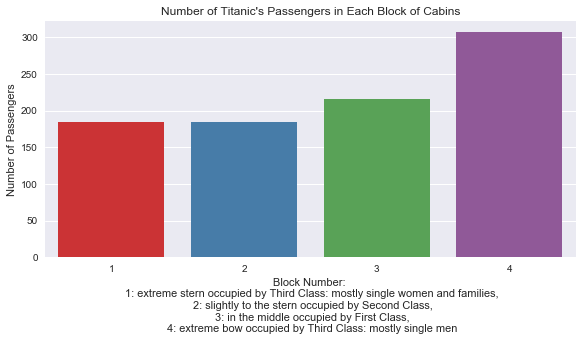

In [178]:
sns.factorplot(x="Block",data=titanic_dataframe,kind="count",aspect = 2,palette = "Set1") 
# The number of passengers in each Block of cabins
plt.xlabel("Block Number: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men")
plt.ylabel("Number of Passengers")
plt.title("Number of Titanic's Passengers in Each Block of Cabins")

#### New columns may be created to give some better readability for the data.

"Survivability"  provides "Survivor" or "Victim" instead of 0 and 1 in the original column "Survived"

"SES"  gives more detailed description for each class instead 1-2-3 in "Pclass"

"Port" shows the whole name of each port instead of its first letter only in "Embarked"

"FamilyMembers" provides the total number of family members aboard for each passenger as "SibSp" + "Parch" 

"Demography" introduces a new classification as boy/girl, man/woman and elder man/woman after it combines age/sex info for each passenger

"Deck" gives the info about the deck level based on Cabin info 

"Block" gives a reference of cabin blocks based on Titanic Deck Plans figure and Pclass, Title and FamilyMembers (it was explained previously)

In [179]:
titanic_dataframe["Survivability"] = titanic_dataframe.Survived.map({0: "Victim", 1: "Survivor"}) 

In [180]:
titanic_dataframe["SES"] = titanic_dataframe.Pclass.map({ 1: "1 (Upper Class)", 2: "2 (Middle Class)", 3: "3 (Lower Class)"})

In [181]:
titanic_dataframe["Port"] = titanic_dataframe.Embarked.map({ "S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})

In [182]:
titanic_dataframe["FamilyMembers"] = titanic_dataframe["SibSp"] + titanic_dataframe["Parch"]
# creates a column with the information about the number of family members aboard

Being aware of "Women and children first" policy, the "Demography" column may be inetersting, becuse the original data set gives only two separated columns of age and sex.

In [183]:
def demography(passenger):
    """
    This function takes age and sex values as inputs and returns a new 
    classifications as boy/girl (for ages <15)  or elder man/woman (ages>60)
    It returns sex for people with ages between 15 and 60
    The age of 15 was choosen arbitrary, because of the lack of information about the "child age" definition for that time.
    """
    age,sex = passenger
    
    if age <15:
        if sex == "male":
            return "boy"
        else:
            return "girl"
    elif age >60:
        if sex == "male":
            return "elder man"
        else:
            return "elder woman"        
    else:
        if sex == "male":
            return "man"
        else:
            return "woman"  

In [184]:
titanic_dataframe["Demography"]=titanic_dataframe[["AgeEstim","Sex"]].apply(demography,axis=1) 
# separates children, elders, and women/men

############################################################################################################



## Exploration phase:

The original data set does not seem to be somehow ordered. 

Ordering by Class and by Name gives some additional information, e.i. groups of people with the same family name will be formed.

In addition, after titanic_dataframe is sorted this way, plots also become more logically organized.

In [185]:
# sorting by the values of the following columns "SES","Name"
titanic_dataframe = titanic_dataframe.sort_values(["SES","Name"])
# taking only a few columns to be analysed
partial_df = titanic_dataframe[["Survivability","SES","Name","AgeEstim","Demography","FamilyMembers","Block"]]
partial_df.head(10)

,Survivability,SES,Name,AgeEstim,Demography,FamilyMembers,Block
730,Survivor,1 (Upper Class),"Allen, Miss. Elisabeth Walton",29.00,woman,0,3
305,Survivor,1 (Upper Class),"Allison, Master. Hudson Trevor",0.92,boy,3,3
297,Victim,1 (Upper Class),"Allison, Miss. Helen Loraine",2.00,girl,3,3
498,Victim,1 (Upper Class),"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,woman,3,3
460,Survivor,1 (Upper Class),"Anderson, Mr. Harry",48.00,man,0,3
275,Survivor,1 (Upper Class),"Andrews, Miss. Kornelia Theodosia",63.00,elder woman,1,3
806,Victim,1 (Upper Class),"Andrews, Mr. Thomas Jr",39.00,man,0,3
571,Survivor,1 (Upper Class),"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.00,woman,2,3
493,Victim,1 (Upper Class),"Artagaveytia, Mr. Ramon",71.00,elder man,0,3
700,Survivor,1 (Upper Class),"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.00,woman,1,3


#### VERY INTERESTING Women Names:

I found that some women names are very interesting, e.g. "Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"

Here is an explanation about married women names of that time:

Woman legal existence as an individual was suspended under ‘marital unity,’ a legal fiction in which the husband and wife were considered a single entity: the husband. As such, when married the wife would assume her husband’s name to become Mrs. his name. 

Source: https://www.huffingtonpost.com/joni-erdmann/why-are-women-still-chang_b_8486370.html

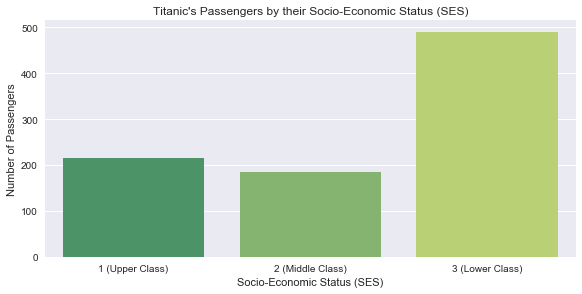

In [186]:
sns.factorplot(x="SES",data=titanic_dataframe,kind="count",aspect = 2, 
               palette = "summer", order = ["1 (Upper Class)","2 (Middle Class)","3 (Lower Class)"]) 
# SES of passengers of Titanic

plt.xlabel("Socio-Economic Status (SES)")
plt.ylabel("Number of Passengers")
plt.title("Titanic's Passengers by their Socio-Economic Status (SES)")

In [187]:
titanic_dataframe["SES"].value_counts() 
# precise number of each class passengers

3 (Lower Class)     491
1 (Upper Class)     216
2 (Middle Class)    184
Name: SES, dtype: int64

#### Conclusion:

The most of Titanic's passengers were the 3 (Lower Class). The number of lower class passenger was more than double of those of two other classes.

#### New question:

We know, that after leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York. 

So, using our data, we will try to better understand how many passengers embarked in each city and who were they.

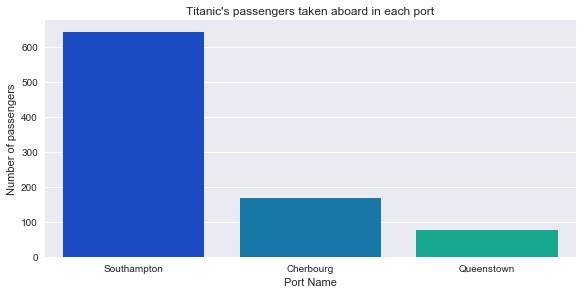

In [188]:
sns.factorplot(x="Port",data=titanic_dataframe,kind="count",aspect = 2,palette = "winter") 
# The number of passengers embarked in each port
plt.xlabel("Port Name")
plt.ylabel("Number of passengers")
plt.title("Titanic's passengers taken aboard in each port")

In [189]:
titanic_dataframe["Port"].value_counts()
# number of passengers embarked in each port

Southampton    644
Cherbourg      168
Queenstown      77
Name: Port, dtype: int64

#### Conclusion: 
Wow, such a big difference in numbers... Why it has happend?

One of the possible explanations is that the dock facilities in Cherbourg as well as in Queenstown were not suitable for a ship of Titanic's size, and tenders were used to bring passengers aboard. (Source: Wikipedia).

So, maybe, those cities were not developped enough and their citizens had no enough money to pay a trip.

#### Question:

What about social and economic status of the passengers embarked in each city?

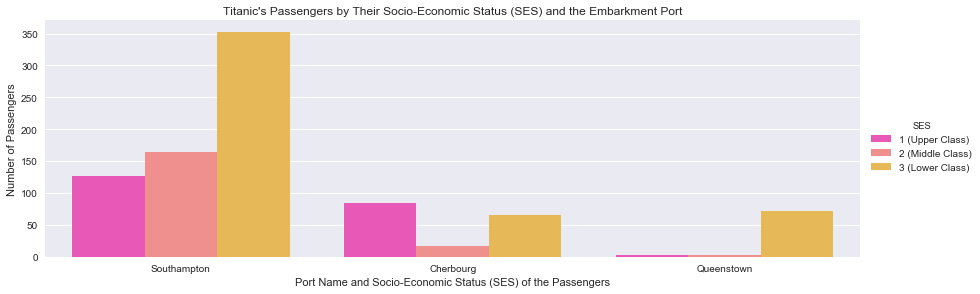

In [190]:
sns.factorplot(x="Port",data=titanic_dataframe,kind="count",hue="SES", 
               aspect = 3,palette = "spring") 
# Shows social and economics aspects of the passengers embarked in each city
plt.xlabel("Port Name and Socio-Economic Status (SES) of the Passengers")
plt.ylabel("Number of Passengers")
plt.title("Titanic's Passengers by Their Socio-Economic Status (SES) and the Embarkment Port")

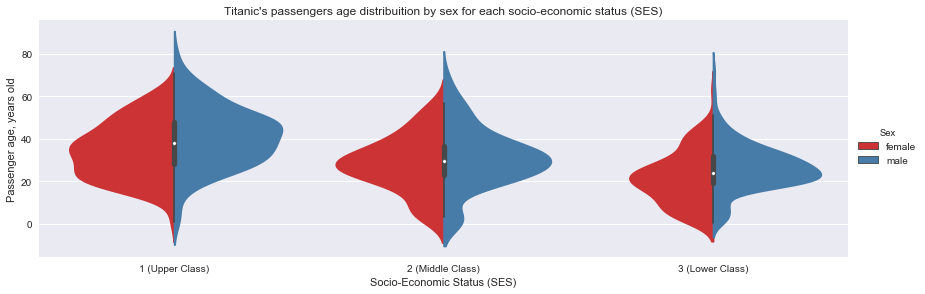

In [191]:
sns.factorplot(x="SES",data= titanic_dataframe,y="AgeEstim",hue="Sex", kind="violin",
               split=True, order = ["1 (Upper Class)","2 (Middle Class)","3 (Lower Class)"],
               aspect=3, palette="Set1")
"""
Demonstrates Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Passenger age, years old")
plt.xlabel("Socio-Economic Status (SES)")
plt.title("Titanic's passengers age distribuition by sex for each socio-economic status (SES)")

#### Conclusion:

Overall, it seems that there were a lot of young people and young families aboard, beacause of the number of young kids and even babies. The most part of adults were aged between 20 - 40 years, with a small number of passengers older than 60.

Middle and Lower Class passnegers have similar age distribuitions. Their main difference is the averege age. Upper class passsenger´s average age was about 40 years old and there were not a lot of children. Upper class women in average were younger than the Upper Class men.

The most part of Lower Class passengers were younger (average age of 20 years) than those from Middle Class ((average age of 30 years). Middle and Lower Class passnegers had no significant difference by age between men and women. 


#### Question: 

How many men, women, children, and elders were aboard? Let´s check some statisctics.

In [192]:
titanic_dataframe["Demography"].value_counts() 
# counts the number of  boys, girls, elders, and women/men

man            515
woman          254
girl            57
boy             43
elder man       19
elder woman      3
Name: Demography, dtype: int64

#### Conclusion:

It is clear, that there were almost twice men than women aboard, while there was an equal number of boys and girls aged less than 15 years old. But there were 6 times more elder men than elder women (older than 60).

#### Question: 

How does this varies accordinly to each passenger class?


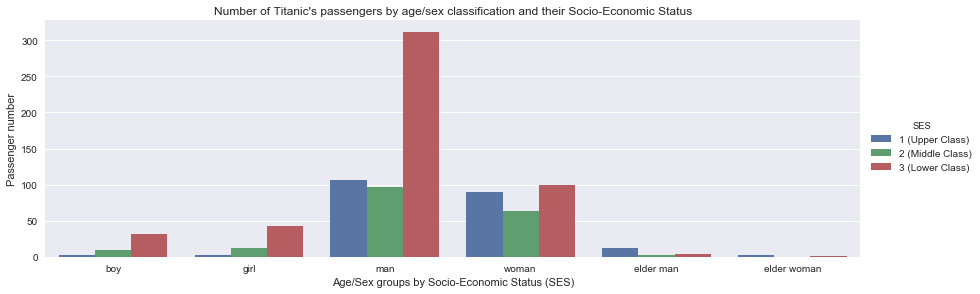

In [193]:
#Shows how many children, elders, women/men in each passenger class
sns.factorplot(x="Demography",data=titanic_dataframe,kind="count",hue ='SES', aspect = 3,
              order = ["boy","girl","man","woman","elder man","elder woman"])
plt.ylabel("Passenger number")
plt.xlabel("Age/Sex groups by Socio-Economic Status (SES)")
plt.title("Number of Titanic's passengers by age/sex classification and their Socio-Economic Status")


#### Conclusion:

There is no significant difference in the number between men and women for the upper class passengers. For the middle class passengers there were about 100 men and 60-70 women. For the lower class passenger the women were only about 35% of men's number.

The most children aboard were from the lower class, only few children were from the upper class.

#### Question: 

This diference between men and women numbers drive us to a new question: "How many family members of each passenger were aboard?"


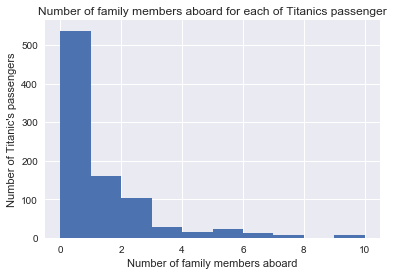

In [194]:
titanic_dataframe["FamilyMembers"].hist() # Shows how many family members of each passenger were aboard
plt.xlabel("Number of family members aboard")
plt.ylabel("Number of Titanic's passengers")
plt.title("Number of family members aboard for each of Titanics passenger")

In [195]:
titanic_dataframe["FamilyMembers"].value_counts()
# number of passenger having family members aboard
# the first column is a number of family members aboard
# the second column is a number of passengers having that number of family members

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilyMembers, dtype: int64

#### Conclusion:

As expected, the majority was without any family members aboard ( 537 from 891). 161 people were with 1 family member,  102 were with 2 family members. 

Despite they were not in a big number, there were some very big families aboard with up to 10 family members!!!

#### Question: 

What passenger class had bigger families aboard?


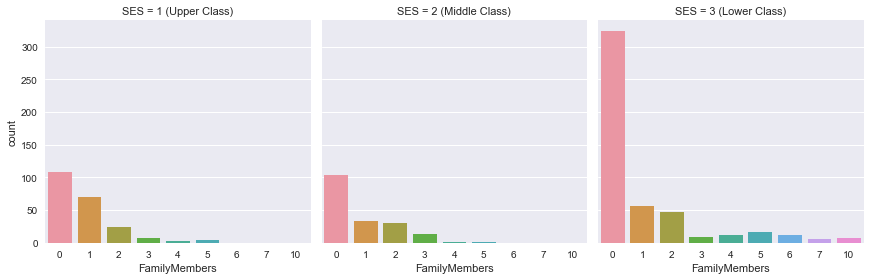

In [196]:
sns.factorplot(x="FamilyMembers",data= titanic_dataframe,kind="count",col='SES') 
# What passenger class had bigger families aboard?

#### Conclusion:

The passengers without any family member aboard were the majority in each class. 

Upper and middle class passengers had no more than 5 family members aboard. Normaly, they had up to 3 family members with them.

In the 3 (Lower Class), I suppose that the larger families as well as a great number of men, were caracteristical signs of immigrants looking for better life in the USA.
At that time, there was a booming immigrant trade between Europe and America, with most of the immigrants traveling in 3rd class – sometimes known as “Steerage.” (Source: http://cruiselinehistory.com/rms-titanic-third-class-or-steerage-passengers-aboard-the-ill-fated-liner/)

#### Question: 

Is it correct to affirm that those without family were alone aboard? Probably, not!!! 

Let us check this idea by sorting the data by cabin names.


In [197]:
# sorting by Cabins
cabin_sorted_dataframe = titanic_dataframe.sort_values(["Cabin"])
cabin_sorted_dataframe = cabin_sorted_dataframe[["Cabin",
                                                 "Survivability","SES","Name",
                                                 "AgeEstim","Demography","FamilyMembers"]]
cabin_sorted_dataframe.head(100)

,Cabin,Survivability,SES,Name,AgeEstim,Demography,FamilyMembers
583,A10,Victim,1 (Upper Class),"Ross, Mr. John Hugo",36.00,man,0
475,A14,Victim,1 (Upper Class),"Clifford, Mr. George Quincy",48.00,man,0
556,A16,Survivor,1 (Upper Class),"Duff Gordon, Lady. (Lucille Christiana Sutherl...",48.00,woman,1
284,A19,Victim,1 (Upper Class),"Smith, Mr. Richard William",38.00,man,0
599,A20,Survivor,1 (Upper Class),"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",49.00,man,1
630,A23,Survivor,1 (Upper Class),"Barkworth, Mr. Algernon Henry Wilson",80.00,elder man,0
867,A24,Victim,1 (Upper Class),"Roebling, Mr. Washington Augustus II",31.00,man,0
647,A26,Survivor,1 (Upper Class),"Simonius-Blumer, Col. Oberst Alfons",56.00,man,0
209,A31,Survivor,1 (Upper Class),"Blank, Mr. Henry",40.00,man,0
185,A32,Victim,1 (Upper Class),"Rood, Mr. Hugh Roscoe",47.00,man,0


#### Conclusion:

As expected, not all the passengers without family members were "alone" aboard Titanic, especially, when we talk about the Upper Class passengers, who, very probably, had some servants with them. 

For exemple, The Allisons boarded Titanic along with four servants: a maid, Sarah Daniels (no relation to Bess); a nurse, Alice Cleaver; a cook, Amelia Mary Brown (Mildred); and a butler, George Swane. Hudson and Bess occupied cabin C-22, Sarah and Loraine occupied C-24, and Alice and Trevor occupied C-26. Two second-class cabins were also booked for George and Mildred. (Source: https://en.wikipedia.org/wiki/Allison_family)

Also, it is necessary to take in consideration, that tants, oncles, cousins, mistresses and fiancés, as well, as other more distant relatives were not considered as family members in the original data set.

Here are some examples that prove that "without family" doesn't mean "alone":

CABIN B28:

shared by two women without close family members related, their family names are different, ages are significantly different

CABIN B35:

shared by two women without close family members related, their family names are different, ages are similar

CABIN C124:

shared by two men without close family members related, their family names are different

CABIN C125:

shared by two women, but only one without close family members related, their family names are different, ages are significantly different


## Surviving Factors Analysis:

Boat Deck was close to the A deck level and it was located in the middle of the ship. 

As far as the boat were filled by the rule"Women and children first" and "First come, first served", it is understandable, that Upper Class women and children were in the very priviledged circumstances.

Let's check the "Women and children first" rule results on the plots.

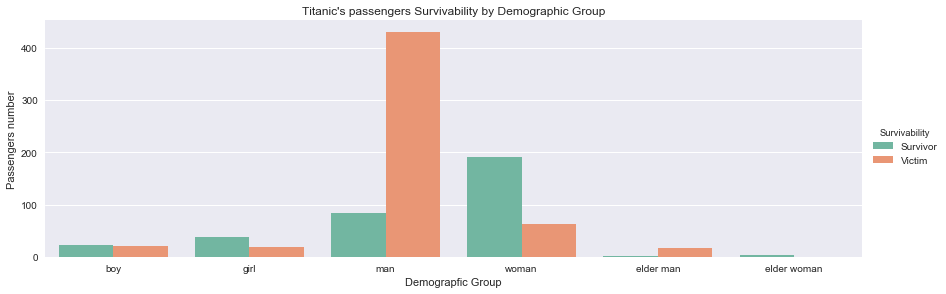

In [198]:
sns.factorplot(x="Demography",data= titanic_dataframe,kind="count",hue='Survivability', aspect = 3,
               palette="Set2",order = ["boy","girl","man","woman","elder man","elder woman"])
# compare the number of survivors and perished for each category man/woman, etc.
plt.ylabel("Passengers number")
plt.xlabel("Demograpfic Group")
plt.title("Titanic's passengers Survivability by Demographic Group")

### Let's take closer a look on the importance of "Women and Children First" policy by extracting the data only for this category of passengers

In [199]:
women_children_df = titanic_dataframe[["Title","AgeEstim","Block","Survivability"]]
women_children_df = women_children_df[women_children_df.Title != 'Mr']
women_children_df = women_children_df[women_children_df.Title != 'Special Title']
# creates a smaller dataframe for survavibilty factors for women and children

In [200]:
women_children_df.head()
# all_master_df - dataframe contaning age information only for people with the title 'Master'

,Title,AgeEstim,Block,Survivability
730,Miss,29.00,3,Survivor
305,Master,0.92,3,Survivor
297,Miss,2.00,3,Victim
498,Mrs,25.00,3,Victim
275,Miss,63.00,3,Survivor


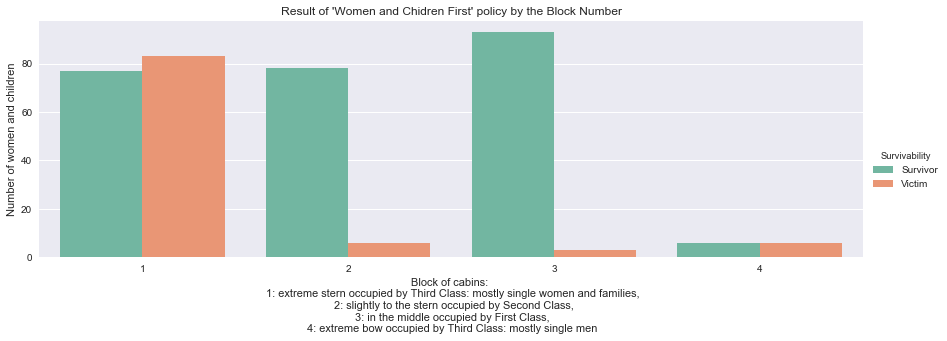

In [201]:
sns.factorplot(x="Block",data= women_children_df,hue="Survivability", 
               aspect=3, kind="count", palette="Set2")
"""
Demonstrate the Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Number of women and children")
plt.xlabel("Block of cabins: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men")
plt.title("Result of 'Women and Chidren First' policy by the Block Number")

#### Conclusion:

That is coherent with the order given on that occasion: "Women and children first" for the Block 2 (Second Class) and Block 3(First Class). Almost all of them have survived. 

On the other hand, more than the half of the women and children from the Block 1 (Third Class) did not survived, even though, the number of the women and children from the Block 1 (Third Class) survived is comparable with the number of survived women and children from two other classes.

#### Question: 

It is interesting to check how does the number of survivors vary for each block of cabins (and class) without considering passenger geneder or age ...


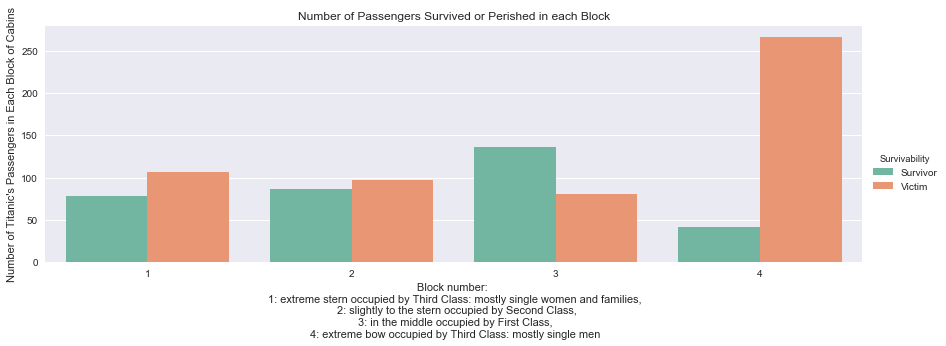

In [202]:
sns.factorplot(hue='Survivability', x="Block",data= titanic_dataframe,kind="count",
               aspect = 3, palette = "Set2")
plt.title("Number of Passengers Survived or Perished in each Block")
plt.ylabel("Number of Titanic's Passengers in Each Block of Cabins")
plt.xlabel("Block number: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men")

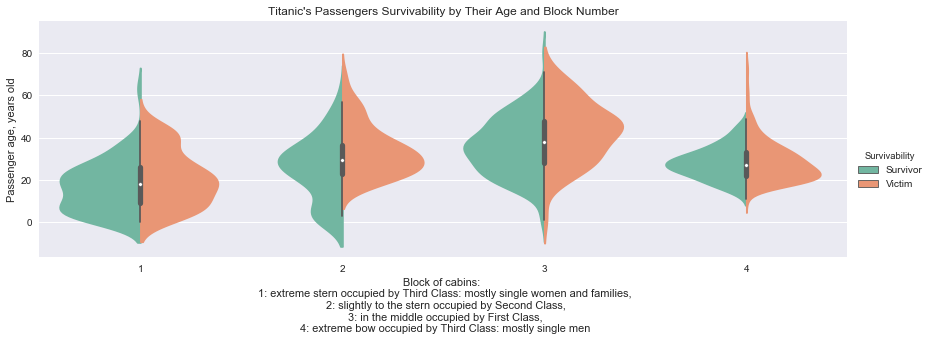

In [227]:
sns.factorplot(x="Block",data= titanic_dataframe,y="AgeEstim",hue="Survivability", 
               kind="violin",split=True,aspect=3, palette="Set2")
"""
Demonstrate the Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Passenger age, years old")
plt.xlabel("Block of cabins: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men")
plt.title("Titanic's Passengers Survivability by Their Age and Block Number")

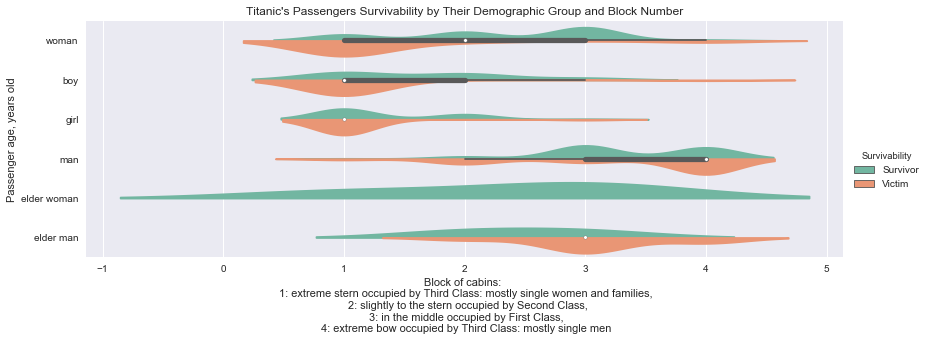

In [226]:
graph_survavibility = sns.factorplot(x="Block",data=titanic_dataframe,y="Demography",hue="Survivability", 
               kind="violin",split=True,aspect=3, palette="Set2")
"""
Demonstrate the Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Passenger age, years old")
plt.xlabel("Block of cabins: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men")
plt.title("Titanic's Passengers Survivability by Their Demographic Group and Block Number")

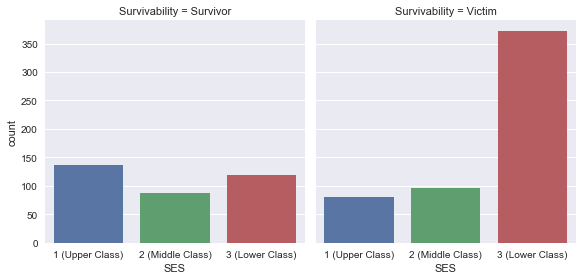

In [204]:
sns.factorplot(x="SES",data= titanic_dataframe,kind="count",col='Survivability')
# survivers versus not survivers numbers for each passenger class

### Conclusion: Being child or woman and having an easy acces to the lifeboat deck were the main factors to become a survivor of Titanic disaster.

Since the NUMBER of survivors from the Lower Class is higher than that of those from the Middle Class and considering that a lot of the Upper Class and the Middle Class passengers perished, it doesn't seem to me, that there was some kind of social discrimination DURING the boarding to the lifeboats. 

Considering the distances from the boat deck to the locations where the Middle Class and Lower Class passengers were hosted and considering that many of them probably were sleeping (Titanic hit an iceberg at 11:40 p.m. ship's time) and that Titanic was considered "unsinkable" and, finally, it took only 2h40 to sink and 1 hour to make a decision of evacuation, so it was hard for the Lower Class passengers (especially for those with kids) not to be late for their chance to obtain a seat in one of the boat.

There is no doubt that the PROPORTION of third-class passengers saved falls far short of the proportion of the first and second class, but this is accounted for by the greater difficulty in getting them up from their quarters, which were at the extreme ends of the ship. There was another issue: In order to prevent the spread of infectious disease, American law prohibted third class passenegers from entering the public areas of the upper two classes, including deck space. So, even on the structure level it was not previewed to give an easy acces for the third class passengers to the lifeboat deck. Surtanly, it took a lot of time before the Third Class passenger were allowed to access the boat deck for evacuation.

#### How aware a Third Class passenger on the Titanic was of what had happened greatly depended on where he or she was quartered. 

Single women and families with children were quartered in the extreme after end of the stern, far from the forward end of the bow on the starboard side of the ship where the collision occurred. For these passengers, aside from the initial jolt (which was noticed by some but by no means all), the only direct evidence of the event were the ship’s engines being shut off within a matter of minutes of the collision. It is quite probable that many Third Class women and families in the after quarters did not notice anything and slept well after midnight before having an inkling of being in danger.

We should not ignore that the number of safety boats was limited, so, there was not enough places for all passengers. On the other hand, the Lower Class passengers represented more than 50% of all passengers. The first boats were loaded partially filled, for the reason nobody knew how much time they had before sinking, they were harried up to put all the boats into the water. Probably, the Upper Class men who survived were those who were given a permission to enter the boats while there were no women and children on the deck during the boarding.

### Analysis of the factors determinated adult male passengers survivability:

Honor and shame ruled society in 1912. Men aboard the Titanic, especially those among the upper class, had to weigh their own survival with doing what society would deem the right thing. To survive but live in shame was a risk some men would not take. Famously several of the wealthiest men, John Jacob Astor, George Widener, and Isodor Strauss, refused to board a lifeboat on grounds of honor, even after it was clear that the Titanic would sink. 

The Third Class passengers residing in the forward quarters—overwhelmingly single men, along with a relatively small number of childless couples, there was considerably more awareness early on as to both the nature and the magnitude of the accident. This would have been especially true of men quartered on the starboard side in the open berths on G Deck and the cabins on F Deck where water from the accident entered directly.

Sources: 

    https://www.encyclopedia-titanica.org/fatal-journey-third-class-men.html
    http://www.icyousee.org/titanic.html
    https://www.encyclopedia-titanica.org/community/threads/deck-restrictions-3rd-class.5074/
    http://cruiselinehistory.com/rms-titanic-third-class-or-steerage-passengers-aboard-the-ill-fated-liner/
    
### Creating DataFrame Exclusivly for Men (indicating if they were with or without family aboard)

In [205]:
def family_man(passenger):
    """
    This function takes Title and FamilyMembers values as inputs and returns 
    the statement if each man was or wasn't with any family member aboard
    """
    title,family = passenger
    
    if title == "Mr":
        if family > 0:
            return "Man with family aboard"
        else:
            return "Man without family aboard"
    

In [206]:
titanic_dataframe["FamilyMan"]=titanic_dataframe[["Title","FamilyMembers"]].apply(family_man,axis=1) 
# stats if each man was or wasn't with any family member aboard

In [207]:
man_survivability_df = titanic_dataframe[["FamilyMan","Block","Survivability","AgeEstim"]].dropna()
# creates a smaller dataframe to analyse 
# men survivability factors such as location,age, and presence of family members

In [208]:
man_survivability_df.head() 
# prints how this dataframe looks like

,FamilyMan,Block,Survivability,AgeEstim
460,Man without family aboard,3,Survivor,48.0
806,Man without family aboard,3,Victim,39.0
493,Man without family aboard,3,Victim,71.0
630,Man without family aboard,3,Survivor,80.0
168,Man without family aboard,3,Victim,27.0


In [209]:
man_survivability_df["FamilyMan"].value_counts()
# counts number of adult male passenger with or without family members aboard

Man without family aboard    413
Man with family aboard       126
Name: FamilyMan, dtype: int64

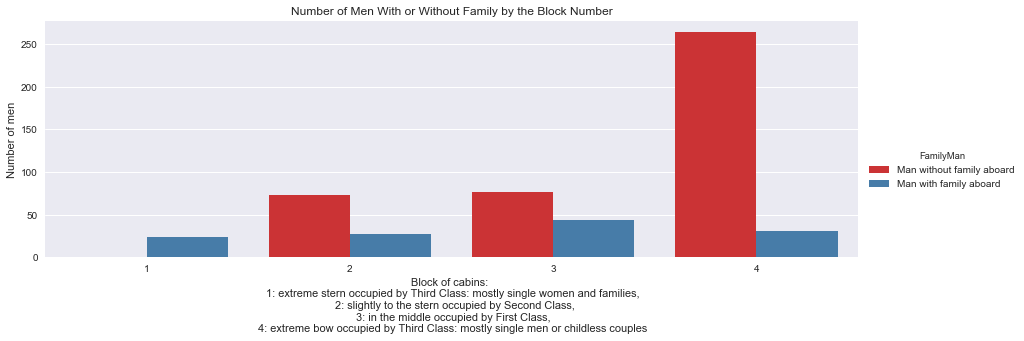

In [210]:
sns.factorplot(x="Block",data= man_survivability_df,hue="FamilyMan", 
               aspect=3, kind="count", palette="Set1")
"""
Demonstrate the Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Number of men")
plt.xlabel("Block of cabins: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men or childless couples")
plt.title("Number of Men With or Without Family by the Block Number")

The plot above is coherent with the idea that only there were no single men at the stern part of the ship, and some couples without children were at the bow part of the ship.

Now let's see if having family aboard was somehow favorable to the men survivabilty.

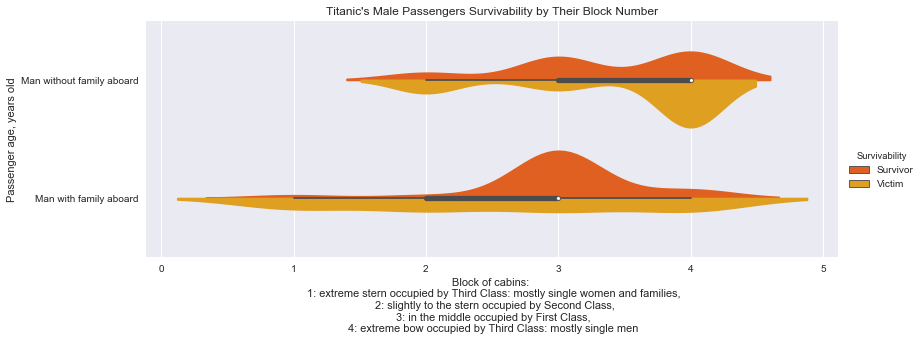

In [211]:
sns.factorplot(x="Block",data= man_survivability_df,y="FamilyMan",hue="Survivability", 
               kind="violin",split=True,aspect=3, palette="autumn")
"""
Demonstrate the Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Passenger age, years old")
plt.xlabel("Block of cabins: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men")
plt.title("Titanic's Male Passengers Survivability by Their Block Number")

It seems that there is some possibility of correlation of men survivabilty with the fact of family aboard for the First Class men.

As it was mentionned above, that the men were allowed to enter lifeboats when there were no women. Since, the First Class men were first to arrive, they have had greater chances to take a place in lifeboats, using their family as "their right" to board.

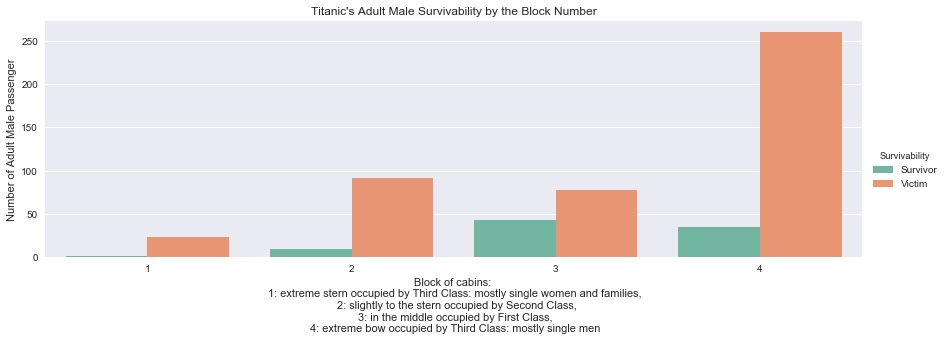

In [212]:
sns.factorplot(x="Block",data= man_survivability_df,hue="Survivability", 
               aspect=3, kind="count", palette="Set2")
"""
Demonstrate the Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Number of Adult Male Passenger")
plt.xlabel("Block of cabins: \n 1: extreme stern occupied by Third Class: mostly single women and families,\n  2: slightly to the stern occupied by Second Class,\n  3: in the middle occupied by First Class, \n 4: extreme bow occupied by Third Class: mostly single men")
plt.title("Titanic's Adult Male Survivability by the Block Number")

### The people who had less chances to survive were the Third class men.

As the story tells us (and the plots confirm) only few of them were able to survive. They were not allowed to enter lifeboats, so they survived by making a crazy but corageous decision to pull to the freezing water and take a chance to find a way to be rescued by the not fully filled boats already int the water or to float on some kind of floating objects until saved by Carpatia.

Even First Class male passenger have lesser chances to survive than those for the Third Class women and children.

### The bottom line of the story is on the last plot and statistics below:


In [213]:
titanic_dataframe["Survivability"].value_counts()
# statistics of victims and survivors
# only 38% has survived

Victim      549
Survivor    342
Name: Survivability, dtype: int64

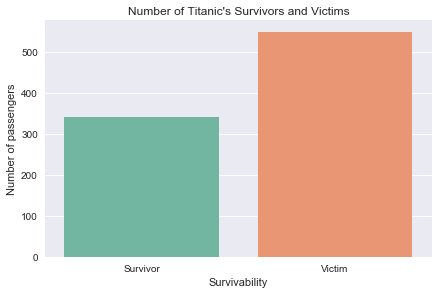

In [214]:
sns.factorplot(x="Survivability",data= titanic_dataframe,
               palette="Set2", kind="count", aspect = 1.5)
plt.ylabel("Number of passengers")
plt.xlabel("Survivability")
plt.title("Number of Titanic's Survivors and Victims")

## A list of Web sites, books, forums, blog posts, github repositories :

The main references were:

    1. https://github.com/jmportilla/Udemy-notes/blob/master/Intro%20to%20Data%20Projects%20-%20Titanic.ipynb   

    2. http://seaborn.pydata.org/tutorial/categorical.html

    3. Course notes from Introduction to Programming Nanodegree Program ("IPND Program") Udacity.

    4. https://en.wikipedia.org/wiki/RMS_Titanic
    
    5. http://www.jessicayung.com/handling-nans-in-your-data-the-titanic-dataset/
    
    6. https://www.encyclopedia-titanica.org


## Improvement Suggestion, including for the data set choice:

In the description of the data set Udacity team has written the following:

"Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic."

In fact, the data set from Udacity Nanodegree as well as that from https://www.kaggle.com/c/titanic/data gives the information about the passengers ONLY. No data on crew  is given in the data set (almost all of of them perished).

In fact, as far as I understood, the original data set from Titanic passengers was splitted by Kaggle into 2 sets of data  (for training and for test)  for machine learning purposes. Since, this is not a goal of this Nanodegree Final Project, why Udacity have not chosen the whole set of ALL Titanic's passengers? Personnaly, I would prefer to analyse more complet data set (and I did so to indulge my curiosity out of the scope of this report) .

For exemple, I found 1 data set here: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls